# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas. There is another notebook: *Advanced Recommender Systems with Python*. That notebook goes into more detail with the same data set.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 3px  black solid !important;
  color: black !important;
}
# For having gridlines 

In [2]:
import numpy as np
import pandas as pd

## Get the Data

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 
df = pd.read_csv('u.data', sep='\t', names=column_names) 

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_titles,on = "item_id")

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [11]:
df.groupby("title")['rating'].mean().sort_values(ascending = False).head() 

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [12]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [13]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [17]:
ratings.head() 

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

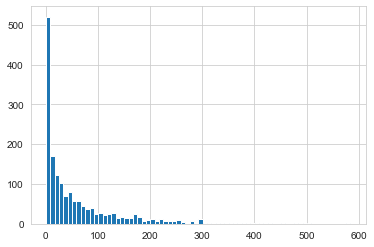

In [18]:
ratings['num of ratings'].hist(bins=70) 

<AxesSubplot:>

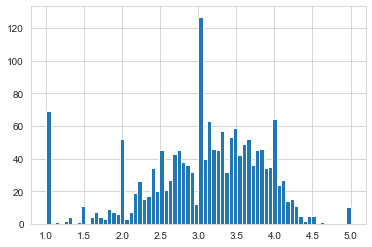

In [19]:
ratings['rating'].hist(bins=70)

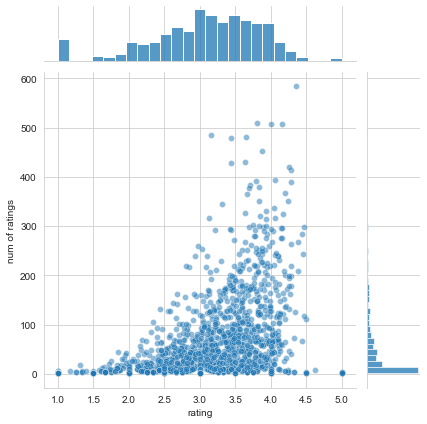

In [21]:
import scipy.stats as stats

j = sns.jointplot(x='rating',y='num of ratings',data = ratings, alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [22]:
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [24]:
toy_story_user_ratings = movie_mat['Toy Story (1995)']
scream_user_ratings = movie_mat['Scream (1996)']

In [25]:
toy_story_user_ratings.head() 

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [26]:
similar_to_toy_story = movie_mat.corrwith(toy_story_user_ratings)
similar_to_toy_story.head()

c:\users\rishabh\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\rishabh\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

In [27]:
similar_to_scream = movie_mat.corrwith(scream_user_ratings)
similar_to_scream.head()

title
'Til There Was You (1997)    0.454859
1-900 (1994)                -0.944911
101 Dalmatians (1996)        0.124059
12 Angry Men (1957)         -0.025659
187 (1997)                   0.382836
dtype: float64

In [28]:
corr_toy_story = pd.DataFrame(similar_to_toy_story,columns=['Correlation'])
corr_toy_story.dropna(inplace=True)

In [29]:
corr_toy_story.head() 

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


- The correlation column tells us how correlated this movie's user ratings were to the star wars user ratings.
- On sorting the dataframe with correlation then we are expecting to get most similar movies, however we should know that in this process there are some results which do not make sense.

In [30]:
corr_toy_story.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Roseanna's Grave (For Roseanna) (1997),1.0
"Substance of Fire, The (1996)",1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
"Newton Boys, The (1998)",1.0
Phantoms (1998),1.0
Guantanamera (1994),1.0
Albino Alligator (1996),1.0
Reckless (1995),1.0


- We can fix this by filtering out movies having number of reviews below a threshold.
- As we see in plot below, there is a serious decline after 100 in number of ratings, so we filter out movies having less than 100 reviews.

<AxesSubplot:>

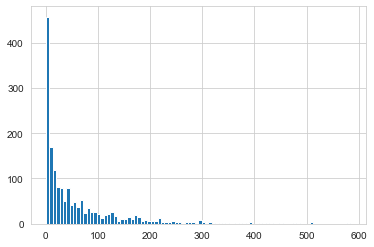

In [31]:
ratings['num of ratings'].hist(bins=90)

In [32]:
corr_toy_story = corr_toy_story.join(ratings['num of ratings']) 

In [33]:
corr_toy_story.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


In [34]:
corr_toy_story[corr_toy_story['num of ratings']>100].sort_values('Correlation',ascending=False).head()
#makes sense, all kids movies get recommended!

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


In [35]:
corr_scream = pd.DataFrame(similar_to_scream,columns=['Correlation'])

In [36]:
corr_scream.head()

,Correlation
title,
'Til There Was You (1997),0.454859
1-900 (1994),-0.944911
101 Dalmatians (1996),0.124059
12 Angry Men (1957),-0.025659
187 (1997),0.382836


In [35]:
corr_liar.dropna(inplace=True) # As NaN aren't of much use in Recommender Systems.

In [36]:
corr_liar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [37]:
corr_scream = corr_scream.join(ratings['num of ratings']) 

In [39]:
corr_scream.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [40]:
corr_scream[corr_scream['num of ratings']>100].sort_values('Correlation',ascending=False).head()

#yeah this definitely makes sense!

,Correlation,num of ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111


- We see that as Liar Liar is a comedy, Mask is also a comedy by same Actor Jim Carrey, also as number of ratings decreases then correlation also goes down. Change the number of ratings threshold and see if you can get better recommendations, or maybe if you are able to filter out suggestions which do not make sense.